# Separately Standing Profanity #

Hypothese:
Because the profane word is separated from the rest of the sentence, the model does not consider it a direct insult.

Reason: “The profane word stands separately at the end or right after a sentence” (Detecting Online Harassment in Social Networks, Brettschneider et al. 2019)

Soruce: List of German Swear Words and Insults(http://www.hyperhero.com/de/insults.htm)



#### Example ####

ID: 1011
Label: True
Prediction: False
Confidence: 0.8278773
Comment: Verwahrloste Lügen-Fresse halten, Ihr dreckigen Verbrecher.

ID: 2052
Label: True
Prediction: False
Confidence: 0.82446724
Comment: Ja ja der Osten, sind schon sehr von sich überzeugt  ,die  analritter.

In [1]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagram_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions2.json')
import csv
import re

In [2]:
#Swear_Word_Deutsch.csv
ger_swear_words = []
with open('../data/Swear_Word_Deutsch.csv', encoding="utf8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        ger_swear_words.append(row['Swear Word'])
# als Teilwort
def all(c):
    return True
def last_is_swearword(element):
    for ger_swear_word in ger_swear_words:
        if len(element['tokens'])>3 and (element['tokens'][-1].text.lower() == ger_swear_word.lower() or element['tokens'][-2].text.lower() == ger_swear_word.lower() or element['tokens'][-3].text.lower() == ger_swear_word.lower()):
            print(element['tokens'])
            print("-------------------------")
            return True
    return False
                
def contains_no_swear_word(element):
    for ger_swear_word in ger_swear_words:
        if element['text'].lower().find(ger_swear_word.lower()) > 0:
            return False
    return True
def contains_swear_word(element):
    for ger_swear_word in ger_swear_words:
        if element['text'].lower().find(ger_swear_word.lower()) > 0 and len(ger_swear_word) > 3:
            return True
    return False

Beleidigte Leberwurst oder Wendehals?
-------------------------
abgewählt ist nicht ausgetreten ... wer mit 48:10 Stimmen abgewählt wird, und dann wegen inhaltlicher Gründe austritt ist einfach nur eine beleidigte Leberwurst.
-------------------------
Es sollten Verfahren wie in den USA eingefuehrt werden, da laesst sich keiner anpoebeln oder anspucken. Wir sind viel zu freundlich zu Kriminellen und Gesetzesbrecher.
-------------------------
Typisch für unsere Politiker .. Sind halt nur Schaumschläger
-------------------------
Blender Macron ist ein Blender.
-------------------------
Zeigt es doch das Macron nur ein Schaumschläger ist.
-------------------------
Beide sind Wichtigtuer, der Extraklasse. Bewegt haben Beide nichts !
-------------------------
Korrekt Ich mag Herrn Lucke nicht...... Aber er hat mit dem was er schreibt den Nagel auf den Kopf getroffen!
-------------------------
Macron ist ein Schaumschläger
-------------------------
Tausende Gefährder und jetzt kommen noch ta

Christoph Hasselbach ist daher ein Dummschwätzer oder ein antideutscher Propagandist (also ein Lügner). Fragt ihn doch einfach, warum er so einen Dreck schreibt.
-------------------------
HE———— Warum haut dem Kerl nicht mal einer was auf die Fresse.
-------------------------
Gebt Greta den Schulnobelpreis und Merkel den Superfraunobelpreis ……….., und Uschi Luschi den Supernobelknallpreis
-------------------------
Lieber brokendriver, Du Phantast, das wird leider nie passieren, denn dafür hat diese Verbrecherin viel zu einflußreiche Freunde. Die guckt sich irgendwann lachend im Fernsehen aus Südamerika an, wenn hier der Bürgerkrieg, dessen Urheberin gewesen ist, tobt und sich einst gute Freunde und sogar Verwandte gegenseitig den Schädel einschlagen.
-------------------------
Räte, dieses Land ist vollgepackt mit irgendwelchen Obskuren Räten welche alle fordern und ihre Minderheiten in den Vordergrund spielen und die Befindlichkeiten des deutschen Volkes in den Dreck treten.
----------

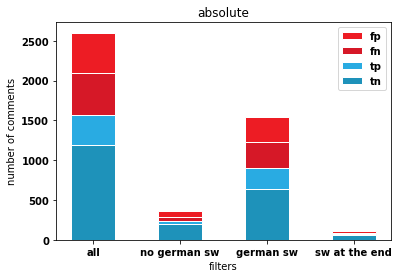

Beleidigte Leberwurst oder Wendehals?
-------------------------
abgewählt ist nicht ausgetreten ... wer mit 48:10 Stimmen abgewählt wird, und dann wegen inhaltlicher Gründe austritt ist einfach nur eine beleidigte Leberwurst.
-------------------------
Es sollten Verfahren wie in den USA eingefuehrt werden, da laesst sich keiner anpoebeln oder anspucken. Wir sind viel zu freundlich zu Kriminellen und Gesetzesbrecher.
-------------------------
Typisch für unsere Politiker .. Sind halt nur Schaumschläger
-------------------------
Blender Macron ist ein Blender.
-------------------------
Zeigt es doch das Macron nur ein Schaumschläger ist.
-------------------------
Beide sind Wichtigtuer, der Extraklasse. Bewegt haben Beide nichts !
-------------------------
Korrekt Ich mag Herrn Lucke nicht...... Aber er hat mit dem was er schreibt den Nagel auf den Kopf getroffen!
-------------------------
Macron ist ein Schaumschläger
-------------------------
Tausende Gefährder und jetzt kommen noch ta

Christoph Hasselbach ist daher ein Dummschwätzer oder ein antideutscher Propagandist (also ein Lügner). Fragt ihn doch einfach, warum er so einen Dreck schreibt.
-------------------------
HE———— Warum haut dem Kerl nicht mal einer was auf die Fresse.
-------------------------
Gebt Greta den Schulnobelpreis und Merkel den Superfraunobelpreis ……….., und Uschi Luschi den Supernobelknallpreis
-------------------------
Lieber brokendriver, Du Phantast, das wird leider nie passieren, denn dafür hat diese Verbrecherin viel zu einflußreiche Freunde. Die guckt sich irgendwann lachend im Fernsehen aus Südamerika an, wenn hier der Bürgerkrieg, dessen Urheberin gewesen ist, tobt und sich einst gute Freunde und sogar Verwandte gegenseitig den Schädel einschlagen.
-------------------------
Räte, dieses Land ist vollgepackt mit irgendwelchen Obskuren Räten welche alle fordern und ihre Minderheiten in den Vordergrund spielen und die Befindlichkeiten des deutschen Volkes in den Dreck treten.
----------

Ich wollte auch gerade schreiben Wieviel der neu zugezogenen Mitbürger können sich selbst ernähren? Wieviel Prozent davon liegt nicht dem Deutschen Staat auf der Tasche? Finde den Fehler....
-------------------------
Sicher sind natürlich wieder ein paar unverbesserliche GRÜNE und LINKE anderer Meinung, aber die interessiert hier kein Mensch.
-------------------------
Zurück zu dem Prozess gegen den mutmaßlichen Mörder , wer zahlt eigentlich diesen Wahlanwalt oder Anwältin , vermutlich doch eine der NGOs , vielleicht sogar wir Steuerzahler.Kann man nur hoffen dass es Rechtsvertreter und nicht Rechtsverdreher sind .
-------------------------
Oder aber vorweg einen politischen Richtungswechsel. Aber um 18o°. Darunter wird es dann nicht mehr gehen. Denn die Karre sitzt bereits zu tief im Dreck.
-------------------------
Das ist doch nicht neu Einige Freundinnen meiner Schwiegertochter müssen wegen fehlender Sprache solche Kurse besuchen und ärgern sich schon lange Störungen , Fehlen und A

. Schwachsinnige degenerierte  deutsche Politiker der Altparteien können gar nicht genug von moslemischen Massenmörder bekommen.
-------------------------
Heute heißen die Schwaben jeden ausländischen Nichtsnutz willkommen!
-------------------------
ZDF macht es vor:  ZDF notorische NESTBESCHMUTZER!
-------------------------
Dem Dreckschwein passiert doch wieder gar nichts!
-------------------------
Merkel, CDU und SPD machen aus Deutschland ein Dritte Welt loch.
-------------------------
Die Krimigranten   sind Raubtiere. Sie lauern und  suchen sich ihre Opfer aus.
-------------------------
Ja, weil Raute und Genossen Kopf kaputt.
-------------------------
Apparatschik Sommer, armes Würstchen mit Spitzengehalt
-------------------------
„Weltoffenheit und Toleranz „, kosten uns den Kopf.
-------------------------
„Niemandem wird durch Flüchtlinge etwas weggenommen!“ (Gauck/Merkel/die üblichen Lügner)
-------------------------
So eine stinkende Kollegin, die erst um Hilfe heischt, um ih

Vor allem, wenn es sich nicht um politisch Verfolgte oder Kriegflüchtlinge handelt sondern um Terroristen, Verbrecher oder leistungsscheue Schmarotzer.
-------------------------
Die hoch-ideologischen Verbots- und Reglementierungs-Fanatiker der Grünen, die auch vor Enteignungen nicht zurückschrecken, reden von "schrägem Demokratie-Verständins" - finde den Fehler...
-------------------------
Erbärmlich diese SPD. Den Namen nicht wert. Das geht schon seit 15 Jahren so aber die Wähler vergessen vor den Wahlen zu schnell und wählen die Versager trotzdem.
-------------------------
Zurück zu Reul , solange er mit seiner Polizeitruppe im Ruhrgebiet nur ein paar Kilo unversteuerten Shishatabak sicher stellt und beschlagnahmte Autos und Immobilien innerhalb weniger Tage zurückgeben muss weil diese Clans sich von Hartz IV die teuersten und besten Anwälte leisten können , solange bleibt er und die Justiz für diese Kriminellen nur die Lachnummer.
-------------------------
Allso  wie immer seit Jah

Was für ein elendes Weib
-------------------------
Denn, was haben die Looser der Altparteien denn seither geschafft? Nichts.
-------------------------
Es bleibt nur zu hoffen, dass die Altparteien der Ausländer mit der Kanzlerin (darstellerin) der Ausländer und dem BundesUHU der Ausländer bei den Wahlen 2019 eine echte Schlappe einfangen und es nicht nur bei einer neuen Ohrfeige bleibt.
-------------------------
Für alle gilt: Geld ist für angebliche Flüchtlinge unbegrenzt da. Alle anderen brauchen nichts.
-------------------------
Zuerst die Altparteien,, dann die EU,  dann die Asylforderer, dann das Ausland, dann das Kindergeld ins Ausland, dann die Entwicklungshilfe, danach ganz lange nichts und dann kommt der Deutsche Depp.
-------------------------
Wer dem Mohamed vertraut, dem hat man das Gehirn geklaut.
-------------------------
Die Ehrenbürgerschaft wird ihr anerkannt, sobald sie sich in Hohenschönhausen niedergelassen gelassen hat. Lebenslang bei Wasser und Brot.
------------

Verwahrloste Lügen-Fresse halten, Ihr dreckigen Verbrecher.
-------------------------
Zerstört Deutschland weiter, ihr Heuchler!
-------------------------
254;255 288;289 305;306 333;334 355;356 388;389 411	"Willkommen liebe Mörder wir sind so tolerant die Dunkelheit bricht bald herein über dieses Land wir reichen euch die Kerzen damit ihr besser seht und euch das nächste Opfer nicht durch die Lappen geht"
-------------------------
165;166 250	Gut und schlecht. Gut, dass er zunächst einmal die schlimmsten Dilettanten und Umvolkungsbetreiber ausschalten will. Schlecht, dass er offensichtlich am Konstrukt der schändlichen EU festhalten möchte.
-------------------------
Nicht Deutschland hat ein schlechteres Verhältnis zu Ungarn, sondern Die Kommunisten Merkel, Schulz, Junker, Weber und die ganze Verbrecher Clique...
-------------------------
Wenn es sich bei den "Innenministern" um volks- und bürgerfeindliche, links-grün-VERSIFFTE und korrupte GESTALTEN handelt (man denke an die linksgrü

Skandal! Gleich gratis Konzert gegen räächts featuring Tote Hosen, Fettes Brot und Grönemeyer! Muhhhhaaaa... Und natürlich fette Kotze Walfilet...
-------------------------
Nichts als Hetze. Warum hilft dieser Mensch nicht seine Heimat wieder aufzubauen? Zu faul, zu feige?
-------------------------
Ja ja, jetzt kommen die ganzen Fakes an Tageslicht! Ich glaube der Lügenpre$$e gar nichts mehr.
-------------------------
Dueutsche sind ja nur personal! di merkel käste werden als Menschen behandelt obwohl es Tier sind!
-------------------------
Du weißt nicht, was die woanders schreibt! Ich schon! 46 Jahre und hohl inder Birne!
-------------------------
Das ist keine Beleidigung! Du bist eine verblödete Fotze!
-------------------------
Du bist weder geistig, noch grammatikalisch in der Lage, dem Robert Meier zu folgen. Also, halt die blöde Fresse!
-------------------------
Wir haben eine Mördergehilfen Regierung Pfui Teufel
-------------------------
Die haben die Argumente unsererseits, me

OK, dann lass ich die besten Anmache-Sprüche drauf drucken, also 1. Du Ficki Ficki ?  und 2. Du Ficki Ficki ? und 3. Du Ficki Ficki ?
-------------------------
Die FDP ist mehr als überflüssig! Blabla machen und wenn nötig Merkel den Popo pudern.
-------------------------
Die abgefressenen Fingernägel sagen schon alles! Die ist gestört und krank im Kopf.
-------------------------
Wer hat diese Made gewählt ?
-------------------------
'Halt''s Maul Brok! Speichellecker!'
-------------------------
222	Die Eltern der jungen Frau hatten Anzeige erstattet. Da gibt es immer noch Menschen,die nach dem Verlust ihres Kindes,immer noch diese Linke-Kranke Ideologie im Kopf haben.
-------------------------
Wenn weiterhin Sozialwissenschaftler den politischen Kurs bestimmen führt das zu nichts gutem.
-------------------------
im Sommer kommen auch die Nächsten Hunderttausende Mörder und Vergewaltiger dank Merkel
-------------------------
Ich persönlich wäre für den elektrischen Stuhl.
-------------

Nicht dass wir schon genug eigene Schnorrer hätten
-------------------------
Und das Fußvolk von Migranten die Noch nie gearbeitet haben. Wollen sich ins gemachte Netz setzen ,Die haben ein IQ von nicht mal 50% .. Also können die auch nicht weiter denken wie ein Schwein scheißt ..
-------------------------
Genau so stelle ich mir einen hässlichen Versager-Nazi vor. Hat ein Anti-Moslem Schild auf, roter Kopf, Bierbauch, langes dreckiges Haar ond angezogen wie der letzte Hartz 4 Penner.
-------------------------
IRONIE OFF: Erhängt das Schwein
-------------------------
So ein feige S......
-------------------------
Auf den Stuhl mit dem Mist
-------------------------
REFUGEES WELCOME.... dieser dreckige Wendehals.
-------------------------
'Und für die Goldstücke dass ganze mit'' nem Fußtritt in den Arsch ☺'
-------------------------
Wozu auch,hier leben sie doch wie die Made im Speck,all inklusive, Go Home , Sozialschmarotzer!
-------------------------
Das dritte Geschlecht sollte im Bu

Das miese Gesindel rausschmeissen!
-------------------------
Der Merkel Fake,' mit dem schoenen Namen  ''Qaser A.''', quasselt ja schon auf dem Weg gen Mekka einen ordentlichen Mist zusammen.
-------------------------
Aufgebaut haben in erster Linie das Land wieder die deutschen Frauen und nicht irgendwelche Dreckstürken, denn die kamen erst, als hier alles schon wiedrer aufgebaut war. Die kamen, weil die in ihren Hinteranatolien nichts zu fressen hatten und hier für ein paar DM alles gemacht haben. Das ehrt sie aber was ist denn mit denen in der dritten, vierten Generation los ? Gangster, Drogendealer, Islamisten, Bescheißer, Abschaum, weiter nichts !
-------------------------
Dank Karneval und dem Lügen Geschwafel der alt Parteien scheint dem deutschen wieder die Sonne ausm Arsch!
-------------------------
Wer heute noch diese grünen Vollidioten wählt, ist selbst ein Vollidiot.
-------------------------
Und wieder bloeckt der Idiot
-------------------------
Ein Mord in Deutschland si

7:57 dieser gottlose Schweinehund.
-------------------------
Widerliches Schmarotzer Gesindel !
-------------------------
Ich glaube Gefängnis ist besser oder die Polizei soll sein Penis abschneiden
-------------------------
+Jimena LINKSROTGRÜNES DÜNNSCHISS GESCHWÄTZ
-------------------------
Man sollte endlich schauen, dass man Geld einfach nachdrucken kann. Und an den Weihnachtsmann...
-------------------------
Das die armen Flüchtlinge keine Magen und Darm Probleme haben wundert mich 🤔 ,,,,,,,,,,,,,,
4228,0,Haben die Regierung und die Medien in der Vergangenheit etwa falsch berichtet? Waren das nur falsche Einschätzungen oder Fakes?, soviel wie die in Arsch gesteckt bekommen
-------------------------
Nicht besser als ein Flüchtling Schande
-------------------------
Aber dann bitte in jedem Fall - und auch dann,,,,,,,,,,,,,,
4346,0,Ihr seid so Heuchler und falsch ... Unnormal wie krank die Menschheit geworden ist, wenn es umgekehrt ist, und ein Flüchtling der Täter. Oder seid ihr da

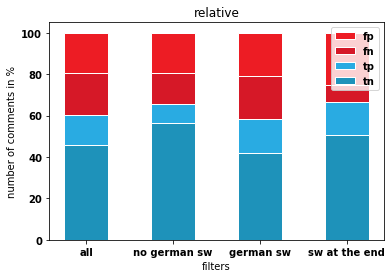

In [3]:
diagram_filters = []
diagram_filters.append(('all', all))
diagram_filters.append(('no german sw',contains_no_swear_word))
diagram_filters.append(('german sw',contains_swear_word))
diagram_filters.append(('sw at the end',last_is_swearword))

#name, filters, relative
create_plt(name = "absolute", filters = diagram_filters, relative = False)
create_plt(name = "relative", filters = diagram_filters, relative = True)

In [4]:
print('all')
show_metrics(calc_metrics())
print('last is swearword')
metric = calc_metrics(last_is_swearword)
show_metrics(metric)

print('last is swearword difference')
show_metrics(calc_metric_difference(metric))

all


,label hate (907),label nohate (1693)
pred hate (885),377,508
pred nohate (1715),530,1185


accuracy,precision,recall,f1_score
0.6007692307692307,0.42598870056497173,0.41565600882028664,0.42075892857142855


last is swearword
Beleidigte Leberwurst oder Wendehals?
-------------------------
abgewählt ist nicht ausgetreten ... wer mit 48:10 Stimmen abgewählt wird, und dann wegen inhaltlicher Gründe austritt ist einfach nur eine beleidigte Leberwurst.
-------------------------
Es sollten Verfahren wie in den USA eingefuehrt werden, da laesst sich keiner anpoebeln oder anspucken. Wir sind viel zu freundlich zu Kriminellen und Gesetzesbrecher.
-------------------------
Typisch für unsere Politiker .. Sind halt nur Schaumschläger
-------------------------
Blender Macron ist ein Blender.
-------------------------
Zeigt es doch das Macron nur ein Schaumschläger ist.
-------------------------
Beide sind Wichtigtuer, der Extraklasse. Bewegt haben Beide nichts !
-------------------------
Korrekt Ich mag Herrn Lucke nicht...... Aber er hat mit dem was er schreibt den Nagel auf den Kopf getroffen!
-------------------------
Macron ist ein Schaumschläger
-------------------------
Tausende Gefährder und je

Eine unglaubliche Geldmaschine ist da am laufen. Das schlimmste aber ist die Lüge, die politische Agenda die diese Politiker verbreiten. Mir ist übel, da nützt auch kein Kübel.
-------------------------
Christoph Hasselbach ist daher ein Dummschwätzer oder ein antideutscher Propagandist (also ein Lügner). Fragt ihn doch einfach, warum er so einen Dreck schreibt.
-------------------------
HE———— Warum haut dem Kerl nicht mal einer was auf die Fresse.
-------------------------
Gebt Greta den Schulnobelpreis und Merkel den Superfraunobelpreis ……….., und Uschi Luschi den Supernobelknallpreis
-------------------------
Lieber brokendriver, Du Phantast, das wird leider nie passieren, denn dafür hat diese Verbrecherin viel zu einflußreiche Freunde. Die guckt sich irgendwann lachend im Fernsehen aus Südamerika an, wenn hier der Bürgerkrieg, dessen Urheberin gewesen ist, tobt und sich einst gute Freunde und sogar Verwandte gegenseitig den Schädel einschlagen.
-------------------------
Räte, dies

,label hate (26),label nohate (81)
pred hate (44),17,27
pred nohate (63),9,54


accuracy,precision,recall,f1_score
0.6635514018691588,0.38636363636363635,0.6538461538461539,0.48571428571428565


last is swearword difference


,label hate (907),label nohate (1693)
pred hate (867),386,481
pred nohate (1733),521,1212


accuracy,precision,recall,f1_score
0.6146153846153846,0.44521337946943484,0.4255788313120176,0.43517474633596387
